In [2]:
# Top level configuration options and convenience functions
ALLOW_ALL = False
ALLOWED_CATEGORIES = ["bicycling", "running", "walking"]

import matplotlib.pyplot as plt
# show images
def show_image(img, gray: bool = False):
    fig, ax = plt.subplots()
    if gray:
        plt.imshow(img, 'gray')
    else: 
        plt.imshow(img)
    plt.show()

def show_images(img1, img2, name1, name2, gray1: bool=False, gray2: bool=False):
    fig, ax = plt.subplots()

    fig.add_subplot(1, 2, 1)
    if gray1:
        plt.imshow(img1, 'gray')
    else:
        plt.imshow(img1)
    plt.title(name1)

    fig.add_subplot(1, 2, 2)
    if gray2:
        plt.imshow(img2, 'gray')
    else:
        plt.imshow(img2)
    plt.title(name2)

    plt.show()


In [3]:
from json import load
from pathlib import Path
from tqdm.auto import tqdm

# Load the annotation data
p = (Path().resolve() / "../pose_data/annotations.json").resolve()
annotations = load(p.open())

# Parse out the categories we care about
valid_imgs = []
for i in tqdm(range(len(annotations["act"]))):
    if ALLOW_ALL or annotations["act"][i]["cat_name"] in ALLOWED_CATEGORIES:
        valid_imgs.append(i)
print(f"Indexed {len(valid_imgs)} valid images")

c:\Users\jdobry\AppData\Local\pypoetry\Cache\virtualenvs\enpm809k-DO_ifH1O-py3.10\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
100%|██████████| 24987/24987 [00:00<00:00, 1765907.43it/s]

Indexed 1457 valid images


100%|██████████| 1457/1457 [00:37<00:00, 38.86it/s]


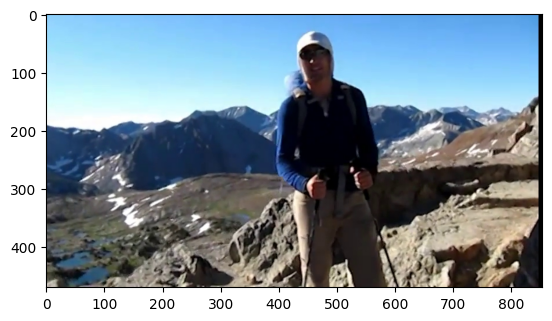

In [4]:
import cv2
import numpy as np

# Load the image data
images = []

for i in tqdm(range(len(valid_imgs))):
    image_name = annotations["annolist"][i]["image"]["name"]
    real_path = (Path().resolve() / "../pose_data/images/" / image_name).resolve()
    img = cv2.imread(real_path.as_posix())
    if img is not None:
        images.append(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

# Show a random image from the data
show_image(images[np.random.randint(0, len(images))])

In [5]:
# Find the smallest image
height, width, depth = images[0].shape
for i in range(len(images)):
    if images[i] is None:
        print(f"{i} is None")
        continue
    h_i, w_i, d_i = images[i].shape
    if h_i < height:
        height = h_i
    if w_i < width:
        width = w_i

print(f"Smallest dimensions {width} x {height}")

Smallest dimensions 360 x 468


100%|██████████| 1454/1454 [03:27<00:00,  7.01it/s]


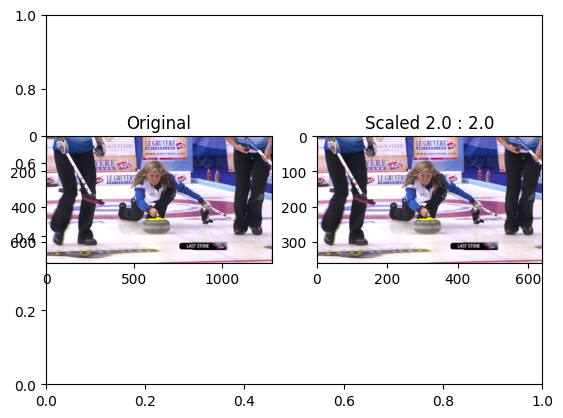

In [6]:
# Resize the images
from skimage.transform import resize

pre_scale = images[0]
RESIZE_HEIGHT = 360
RESIZE_WIDTH = 640
scale_factors = []
for i in tqdm(range(len(images))):
    scale_factors.append({"height": images[i].shape[0] / RESIZE_HEIGHT,
                          "width": images[i].shape[1] / RESIZE_WIDTH})
    images[i] = resize(images[i], (RESIZE_HEIGHT, RESIZE_WIDTH))
show_images(pre_scale, images[0], "Original", f"Scaled {scale_factors[0]['height']} : {scale_factors[0]['width']}")

100%|██████████| 1454/1454 [00:02<00:00, 546.44it/s]


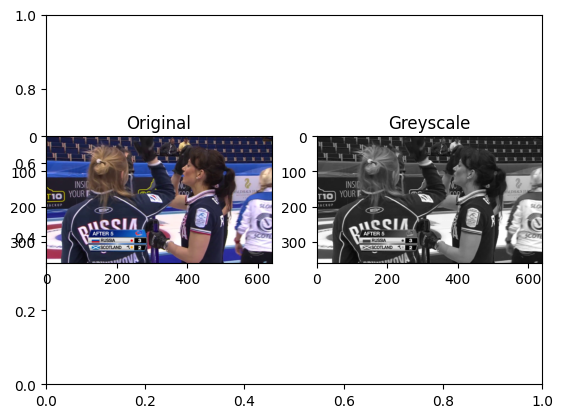

In [7]:
# Make all of the images greyscale
from skimage.color import rgb2gray

pre_grey = images[1]
for i in tqdm(range(len(images))):
    images[i] = rgb2gray(images[i])
show_images(pre_grey, images[1], "Original", "Greyscale", False, True)

0.39946255298735506
